In [1]:
import pandas as pd
from pathlib import Path
from feature_engineering.feature_selection.functions_lasso_L1_regularization import run_classification_lasso, run_regression_lasso

In [2]:
# Load data
data_folder_path = Path('../../../data/')
data = pd.read_csv(data_folder_path / 'data_train_all.csv')
data_columns = pd.read_csv(data_folder_path / 'data_train_all_columns.csv')

print("Training data shape:", data.shape)
print("Column table columns:", data_columns.columns)
print("Unique column types:", data_columns.column_type.unique())

predictor_columns = data_columns[data_columns['column_type'].isin(['predictor_n_grams', 'predictor_continuous'])]['column_name'].tolist()
print(f"Number of predictor columns: {len(predictor_columns)}")

target_columns = data_columns[data_columns['column_type'] == 'target']['column_name'].tolist()
print(f"Target columns: {target_columns}")
print(f"Number of target columns: {len(target_columns)}")

Training data shape: (255606, 144)
Column table columns: Index(['column_name', 'column_type'], dtype='object')
Unique column types: ['id' 'data' 'target' 'predictor_continuous' 'predictor_n_grams']
Number of predictor columns: 119
Target columns: ['spotify_popularity', 'on_hot100', 'decade', 'main_genre']
Number of target columns: 4


In [3]:
# Where to save the feature importance results
data_output_path =  Path('')

Training Lasso (L1) for: decade
Total data size: 255606
Using 5-fold cross-validation

Cross-validation accuracy scores: [0.43038222 0.43113398 0.43080143 0.43207293 0.43230766]
Mean CV accuracy: 0.4313 (+/- 0.0007)

Classification Report:
              precision    recall  f1-score   support

      1950.0       0.00      0.00      0.00      1098
      1960.0       0.22      0.00      0.00      6650
      1970.0       0.17      0.01      0.01     11741
      1980.0       0.05      0.00      0.00     13954
      1990.0       0.18      0.00      0.01     28002
      2000.0       0.29      0.13      0.18     58278
      2010.0       0.45      0.94      0.61    109125
      2020.0       0.00      0.00      0.00     26758

    accuracy                           0.43    255606
   macro avg       0.17      0.14      0.10    255606
weighted avg       0.29      0.43      0.30    255606



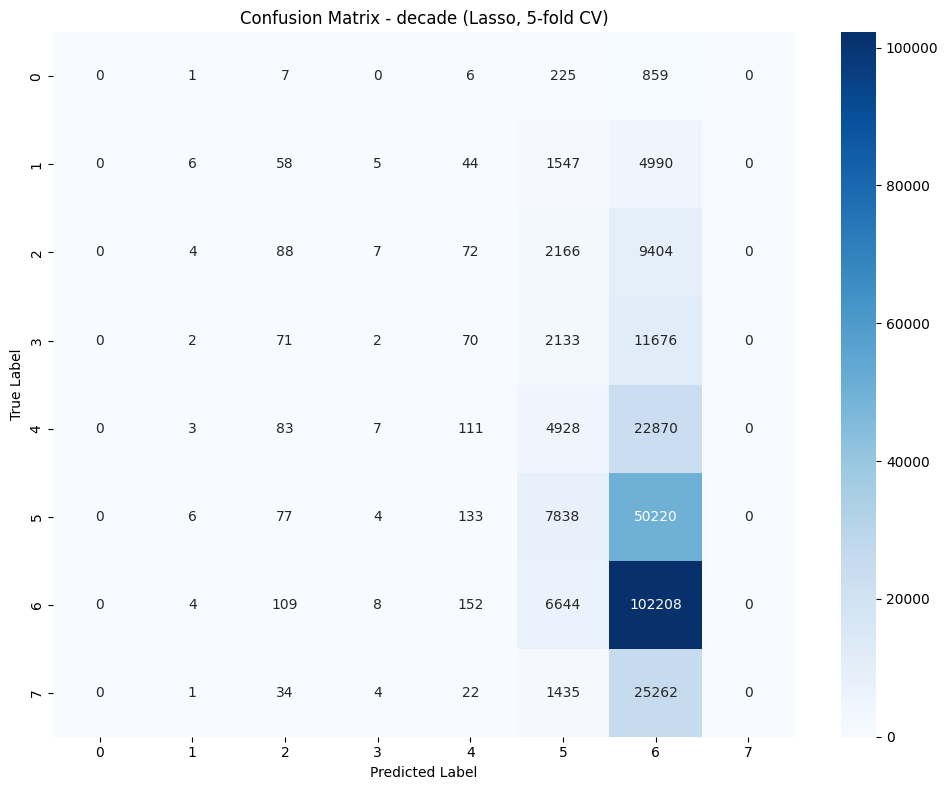


Number of features selected: 119 out of 119

Top 20 features for decade:
                  feature  importance
5        average_4overlap      1.5395
2         min_triad_ratio      1.3410
7        average_2overlap      1.2823
88         contains_G,C,G      0.8851
8         average_overlap      0.8384
9             drone_ratio      0.8308
0    unique_chord_density      0.7064
75      contains_F,G,Amin      0.6827
66      contains_F,Amin,G      0.6751
80      contains_G,Amin,F      0.6485
6        average_3overlap      0.6292
82      contains_Emin,C,G      0.6268
1    unique_5gram_density      0.5873
3         maj_triad_ratio      0.5637
78      contains_Amin,G,F      0.5547
84         contains_C,D,G      0.5320
4        average_5overlap      0.5264
91      contains_G,C,Emin      0.5225
113     contains_G,D,Amin      0.5061
14     contains_D,C,G,D,C      0.5056

Feature importance saved to: feature_selection/lasso_feature_importance_decade.csv


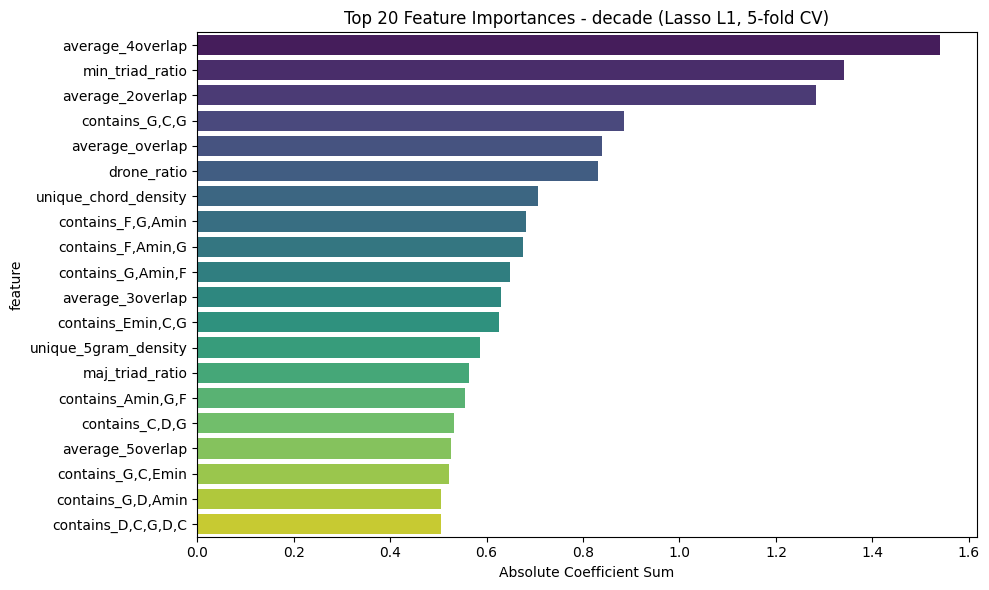

In [4]:
# Run Lasso for decade (multi-class classification)
decade_importance = run_classification_lasso(data, predictor_columns, 'decade', data_output_path, is_binary=False)

Training Lasso (L1) for: main_genre
Total data size: 255606
Using 5-fold cross-validation

Cross-validation accuracy scores: [0.29087281 0.29191526 0.29015473 0.29035035 0.2905264 ]
Mean CV accuracy: 0.2908 (+/- 0.0006)

Classification Report:
              precision    recall  f1-score   support

 alternative       0.26      0.06      0.10     35884
     country       0.33      0.36      0.34     37995
  electronic       0.00      0.00      0.00      1711
        jazz       0.00      0.00      0.00      4491
       metal       0.30      0.04      0.07      8597
         pop       0.29      0.68      0.41     61711
    pop rock       0.16      0.00      0.00     28824
        punk       0.20      0.00      0.01     12229
         rap       0.33      0.02      0.04      7354
      reggae       0.23      0.00      0.00      2783
        rock       0.27      0.33      0.30     48815
        soul       0.15      0.00      0.00      5212

    accuracy                           0.29    25560

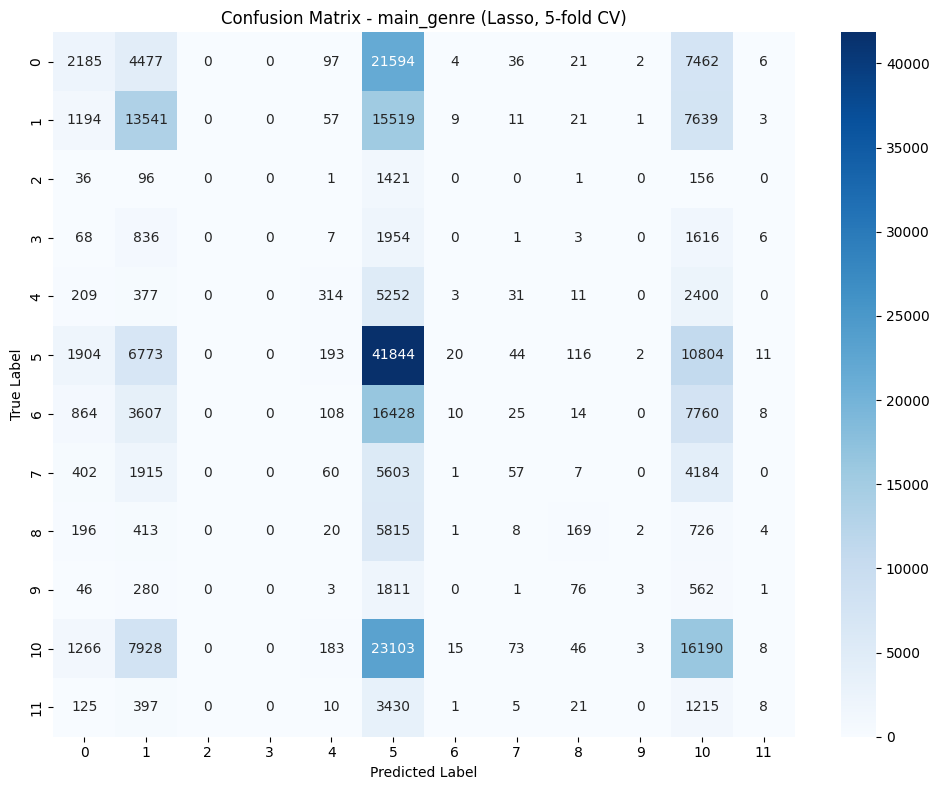


Number of features selected: 119 out of 119

Top 20 features for main_genre:
                  feature  importance
5        average_4overlap      3.3704
2         min_triad_ratio      2.3958
8         average_overlap      2.2487
6        average_3overlap      2.2001
1    unique_5gram_density      2.0470
3         maj_triad_ratio      1.4983
7        average_2overlap      1.3529
4        average_5overlap      1.2164
0    unique_chord_density      1.2065
9             drone_ratio      1.0203
114     contains_Amin,D,G      0.8845
84         contains_C,D,G      0.7035
88         contains_G,C,G      0.6821
82      contains_Emin,C,G      0.6317
80      contains_G,Amin,F      0.6130
86         contains_C,G,D      0.5881
75      contains_F,G,Amin      0.5737
85      contains_C,G,Amin      0.5042
16     contains_C,G,D,C,G      0.4799
79         contains_G,D,C      0.4747

Feature importance saved to: feature_selection/lasso_feature_importance_main_genre.csv


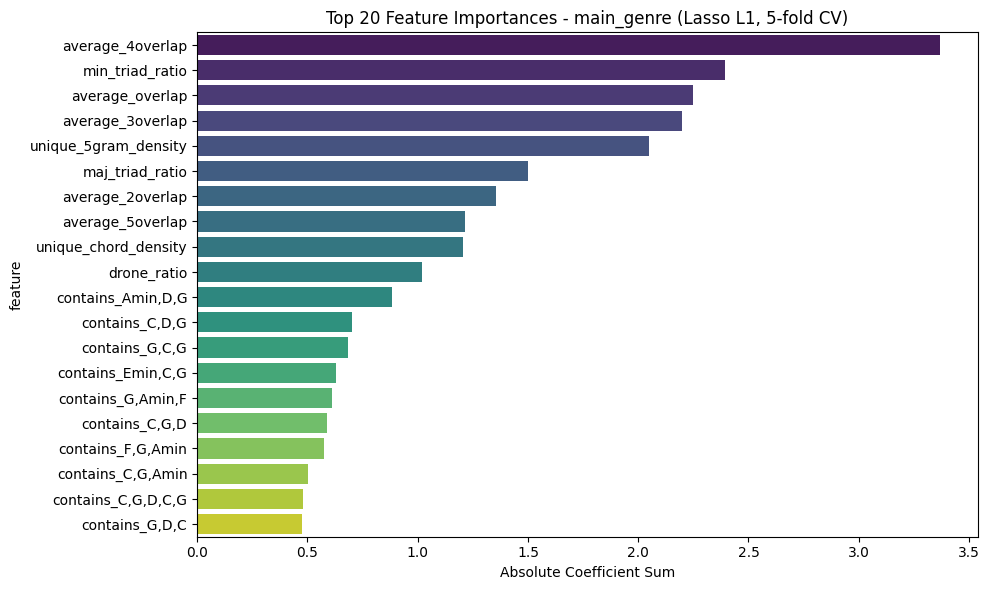

In [6]:
# Run Lasso for main_genre (multi-class classification)
genre_importance = run_classification_lasso(data, predictor_columns, 'main_genre', data_output_path, is_binary=False)

Training Lasso (L1) for: on_hot100
Total data size: 181159
Using 5-fold cross-validation

Cross-validation accuracy scores: [0.96469971 0.96469971 0.96469971 0.96469971 0.96469874]
Mean CV accuracy: 0.9647 (+/- 0.0000)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    174764
         1.0       0.00      0.00      0.00      6395

    accuracy                           0.96    181159
   macro avg       0.48      0.50      0.49    181159
weighted avg       0.93      0.96      0.95    181159



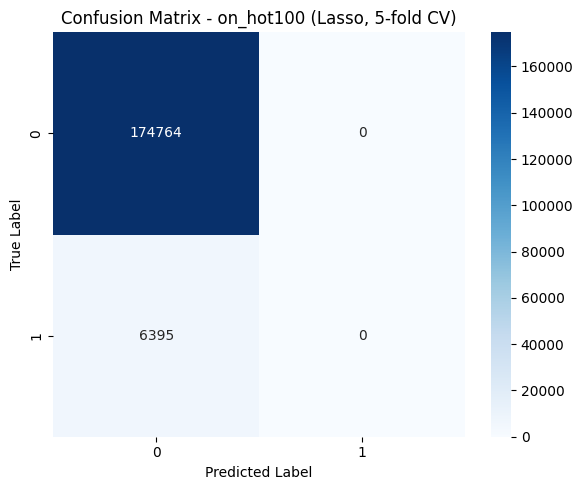


Number of features selected: 110 out of 119

Top 20 features for on_hot100:
                   feature  importance
9              drone_ratio      0.2269
8          average_overlap      0.1714
7         average_2overlap      0.1535
1     unique_5gram_density      0.1251
3          maj_triad_ratio      0.1009
84          contains_C,D,G      0.0995
82       contains_Emin,C,G      0.0976
68       contains_G,Amin,C      0.0806
59      contains_C,G,D,G,C      0.0744
98        contains_G,D,G,C      0.0648
2          min_triad_ratio      0.0629
108    contains_Amin,F,C,G      0.0610
85       contains_C,G,Amin      0.0594
13   contains_F,C,G,Amin,F      0.0562
96     contains_Amin,F,G,C      0.0512
87          contains_C,G,C      0.0489
6         average_3overlap      0.0485
0     unique_chord_density      0.0479
89          contains_G,C,D      0.0476
105       contains_D,G,C,G      0.0472

Feature importance saved to: feature_selection/lasso_feature_importance_on_hot100.csv


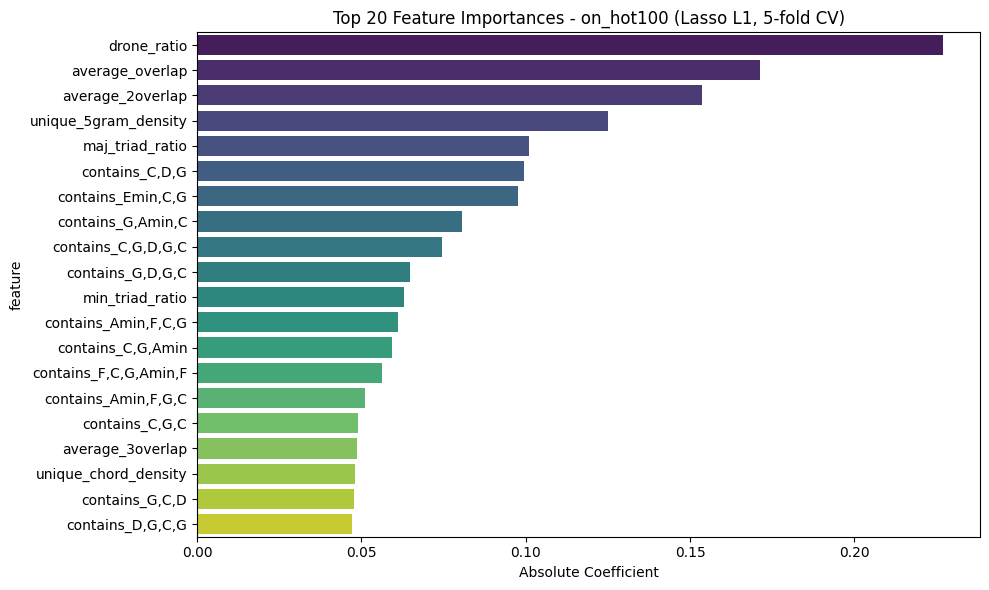

In [8]:
# Run Lasso for on_hot100 (binary classification)
hot100_importance = run_classification_lasso(data, predictor_columns, 'on_hot100', data_output_path, is_binary=True)